In [1]:
# Import packages
import pandas as pd
import fiona
import geopandas as gpd
import pysal as ps
import sklearn
import sys,os
import matplotlib.pyplot as plt
import mplleaflet
%matplotlib inline
import numpy as np
from shapely.geometry import Polygon
print("Importing packages..")

Importing packages..


In [2]:
ride_data = "/Users/avipsaroy/Dropbox (ASU)/Strava Analysis/Data/MAG2016/maricopa_2016_ride/"
official_counts = "/Users/avipsaroy/Dropbox (ASU)/Strava Analysis/Data/MAG2016/MAG_Official_Counts/MAG2015_16/"
mag2016_edges_strava = gpd.read_file(ride_data+"Edges/maricopa_osm_edges.shp")
mag2016_nodes_strava = gpd.read_file(ride_data+"Nodes/maricopa_osm_edges_nodes.shp")
mag2016_od_poly_strava = gpd.read_file(ride_data+"OD/maricopa_edges_od_polygons.shp")
print("No. of Streets in Maricopa County = " + str(mag2016_edges_strava.shape[0]))
print("No. of intersections in Maricopa County = " + str(mag2016_nodes_strava.shape[0]))
print("No. of unique bicycle routes in Maricopa County = " + str(mag2016_od_poly_strava.shape[0]))

No. of Streets in Maricopa County = 498930
No. of intersections in Maricopa County = 372466
No. of unique bicycle routes in Maricopa County = 2343


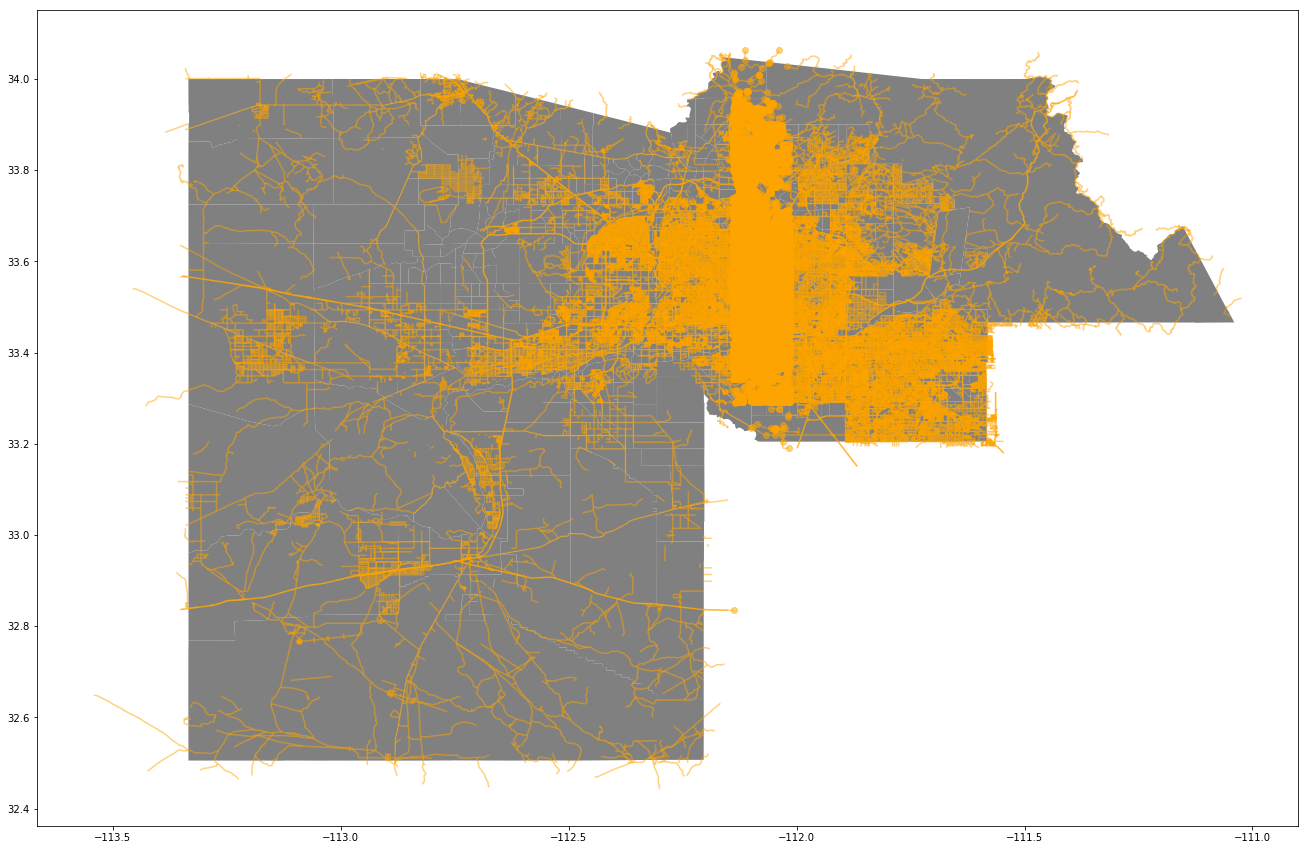

In [3]:
ax = mag2016_od_poly_strava.plot(color='grey', figsize = ([25,15]))
mag2016_edges_strava.plot(ax=ax, color='orange', alpha=0.5, figsize = ([25,15]))
mag2016_nodes_strava[120000:200000].plot(ax=ax, color='orange', alpha=0.5, figsize = ([25,15]))

In [3]:
#Read files for Tempe
tempe_edges_strava = gpd.read_file("Tempe shapefiles/Tempe_edges_zipcodes.shp")
tempe_nodes_strava = gpd.read_file("Tempe shapefiles/Tempe_nodes_zipcodes.shp")
tempe_od_strava = gpd.read_file("Tempe shapefiles/Tempe_OD_zipcodes.shp")
tempe_zipcodes = gpd.read_file("Tempe shapefiles/Tempe_zipcodes.shp")
print("No. of streets in Tempe = " + str(tempe_edges_strava.shape[0])
      + "\nNo. of intersections in Tempe = " + str(tempe_nodes_strava.shape[0])
      + "\nNo. of OD polygons in Tempe = " + str(tempe_od_strava.shape[0]))

No. of streets in Tempe = 26045
No. of intersections in Tempe = 18945
No. of OD polygons in Tempe = 122


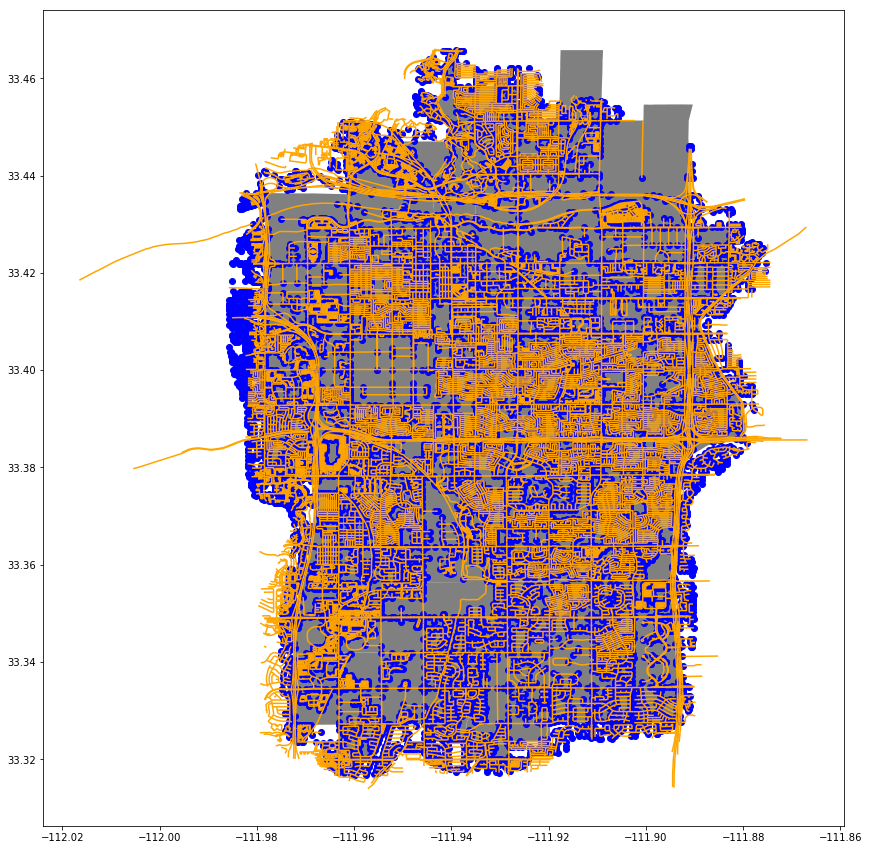

In [5]:
ax = tempe_od_strava.plot(color='grey', figsize = ([25,15]))
tempe_edges_strava.plot(ax=ax, color='orange', figsize = ([25,15]))
tempe_nodes_strava.plot(ax=ax, color='blue', figsize = ([25,15]))
#mag2015_16_official.plot(ax=ax, color = "green", figsize = ([25,15]))

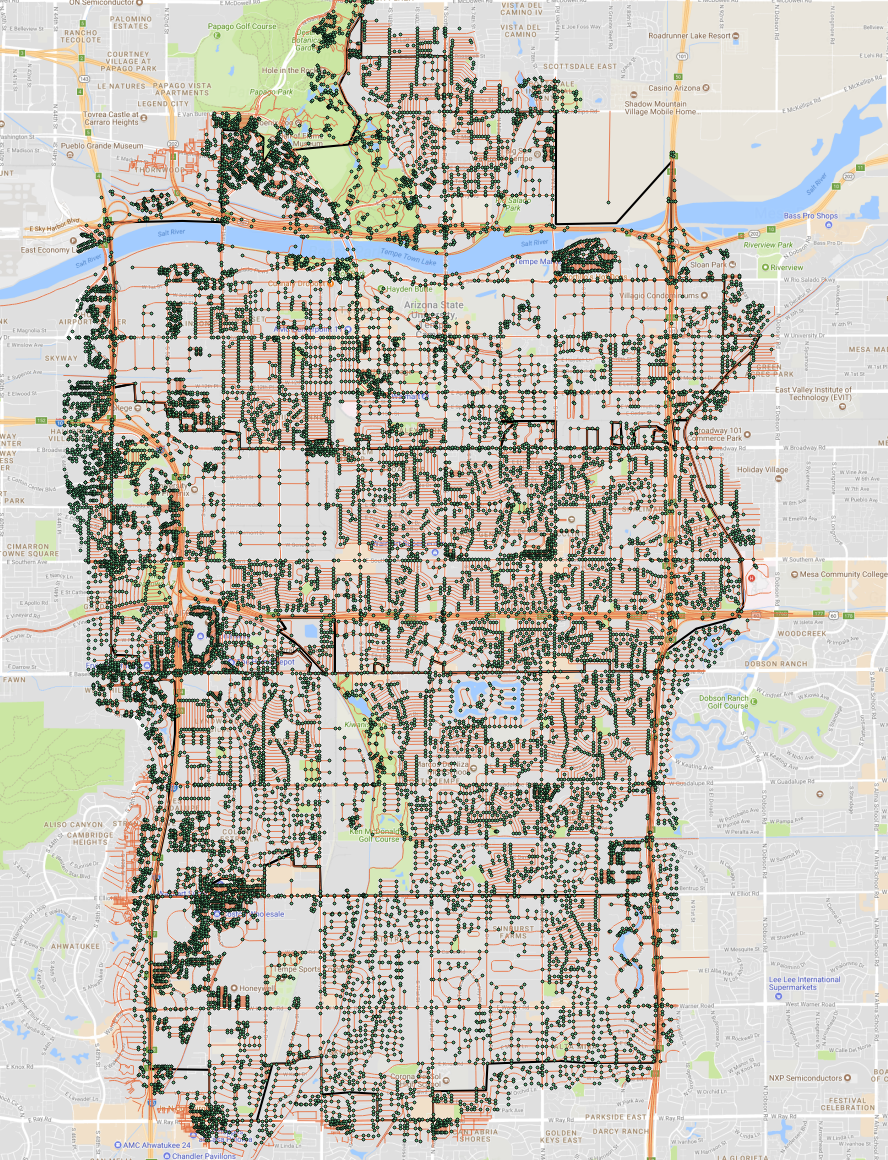

In [6]:
from IPython.display import Image
Image(filename='Figures/Tempe_zipcodes_street_gmaps.png') 

In [18]:
#Plot the Strava riders along streets by Month
path = "/Users/avipsaroy/Dropbox (ASU)/Strava Analysis/Data/MAG2016/maricopa_2016_ride/Edges/"
months = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
df_months = {}
df_months_merged = {}
def merge_monthly_total(df):
    x = df.merge(tempe_edges_strava, left_on ='edge_id', right_on = 'ID')
    return x
for i in range(0,12):
    df = months[i]+"_total_strava"
    filename = path + "maricopa_2016_ride_rollup_month_2016_"+str(i+1)+"_total.csv"
    x = pd.read_csv(filename)
    df_months[df] = x
    df1 = months[i]+"_total_strava_merged"
    merged = x.merge(tempe_edges_strava, left_on ='edge_id', right_on = 'ID')
    df_months_merged[df1] = merged
    merged.to_csv(ride_data + "Analysis_Generated_Data/"+df1+".csv")
    print(filename)

/Users/avipsaroy/Dropbox (ASU)/Strava Analysis/Data/MAG2016/maricopa_2016_ride/Edges/maricopa_2016_ride_rollup_month_2016_1_total.csv
/Users/avipsaroy/Dropbox (ASU)/Strava Analysis/Data/MAG2016/maricopa_2016_ride/Edges/maricopa_2016_ride_rollup_month_2016_2_total.csv
/Users/avipsaroy/Dropbox (ASU)/Strava Analysis/Data/MAG2016/maricopa_2016_ride/Edges/maricopa_2016_ride_rollup_month_2016_3_total.csv
/Users/avipsaroy/Dropbox (ASU)/Strava Analysis/Data/MAG2016/maricopa_2016_ride/Edges/maricopa_2016_ride_rollup_month_2016_4_total.csv
/Users/avipsaroy/Dropbox (ASU)/Strava Analysis/Data/MAG2016/maricopa_2016_ride/Edges/maricopa_2016_ride_rollup_month_2016_5_total.csv
/Users/avipsaroy/Dropbox (ASU)/Strava Analysis/Data/MAG2016/maricopa_2016_ride/Edges/maricopa_2016_ride_rollup_month_2016_6_total.csv
/Users/avipsaroy/Dropbox (ASU)/Strava Analysis/Data/MAG2016/maricopa_2016_ride/Edges/maricopa_2016_ride_rollup_month_2016_7_total.csv
/Users/avipsaroy/Dropbox (ASU)/Strava Analysis/Data/MAG2016/ma

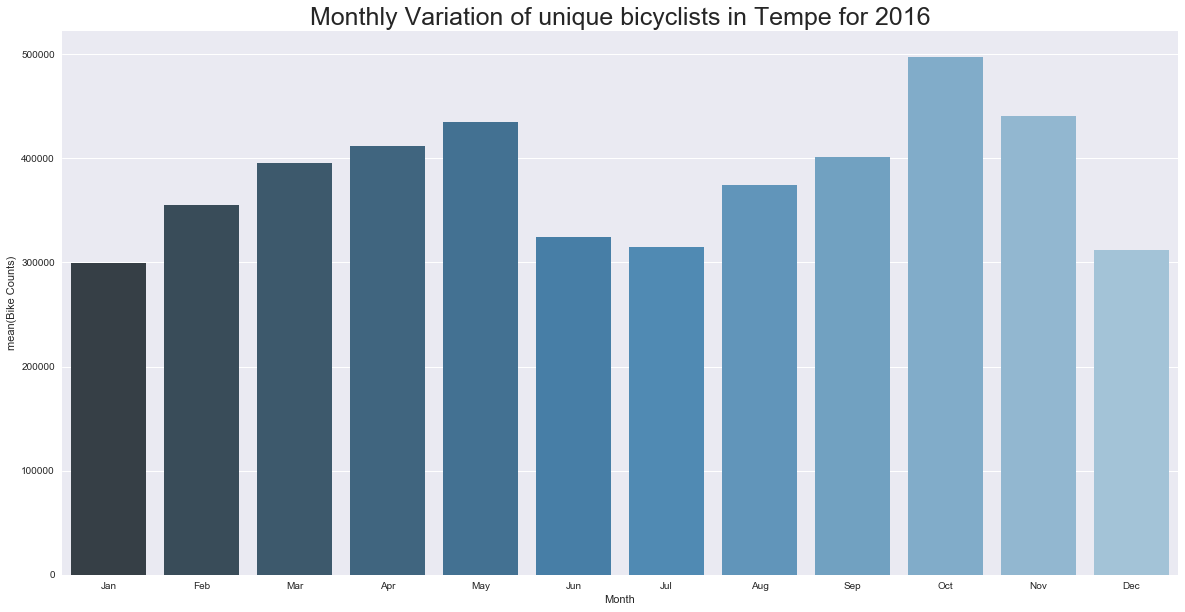

In [19]:
jan = df_months_merged["jan_total_strava_merged"][["actcnt"]].dropna().sum()
feb = df_months_merged["feb_total_strava_merged"][["actcnt"]].dropna().sum()
mar = df_months_merged["mar_total_strava_merged"][["actcnt"]].dropna().sum()
apr = df_months_merged["apr_total_strava_merged"][["actcnt"]].dropna().sum()
may = df_months_merged["may_total_strava_merged"][["actcnt"]].dropna().sum()
jun = df_months_merged["jun_total_strava_merged"][["actcnt"]].dropna().sum()
jul = df_months_merged["jul_total_strava_merged"][["actcnt"]].dropna().sum()
aug = df_months_merged["aug_total_strava_merged"][["actcnt"]].dropna().sum()
sep = df_months_merged["sep_total_strava_merged"][["actcnt"]].dropna().sum()
oct1 = df_months_merged["oct_total_strava_merged"][["actcnt"]].dropna().sum()
nov = df_months_merged["nov_total_strava_merged"][["actcnt"]].dropna().sum()
dec = df_months_merged["dec_total_strava_merged"][["actcnt"]].dropna().sum()
month = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
values = [jan,feb,mar,apr,may,jun,jul,aug,sep,oct1,nov,dec]
plotdf = pd.DataFrame({'Month' : month,
                       'Bike Counts': values})
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,10))
sns.set(sns.set_context("paper", rc={"font.size":8,"axes.titlesize":25,"axes.labelsize":20,"xtick.labelsize":15,"ytick.labelsize":15}))
#sns.set_context("paper")
sns.barplot(x="Month", y="Bike Counts", data = plotdf, palette="Blues_d").set_title("Monthly Variation of unique bicyclists in Tempe for 2016")
#sns.regplot(x=np.range(1,13), y="Bike Counts", data = plotdf)
plt.show()

In [2]:
# Plot histogram for bike counts in April/May and Oct/Nov
ride_data = "/Users/avipsaroy/Dropbox (ASU)/Strava Analysis/Data/MAG2016/maricopa_2016_ride/"
apr_min_by_min = pd.read_csv(ride_data + "Analysis_Generated_Data/apr_tempe_min_by_min.csv")
apr_daily_count = apr_min_by_min[["edge_id","day","athlete_count"]].groupby(["edge_id","day"]).count()

/Users/avipsaroy/Applications/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (126) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
#df = apr_min_by_min[["edge_id","day","athlete_count"]].query("day>=91 & day<121").groupby(["edge_id","day"]).sum()
df.query("athlete_count>10").plot(x = "edge_id",y="athlete_count",)

,athlete_count
count,6309.000000
mean,16.644476
std,6.009024
min,11.000000
25%,12.000000
50%,15.000000
75%,19.000000
max,57.000000


In [ ]:
apr_daily_count.describe()

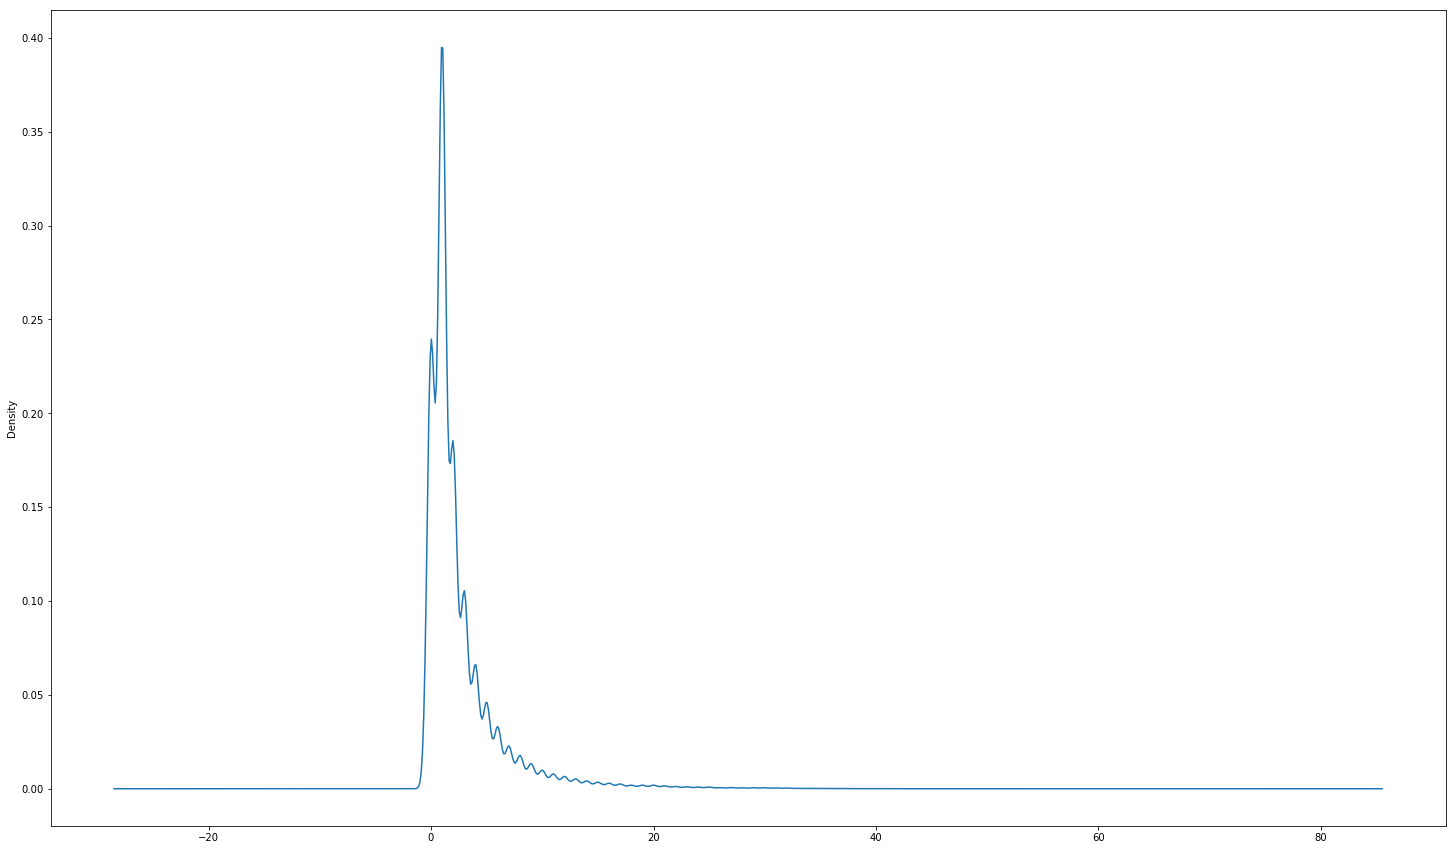

In [14]:
df.loc[df["athlete_count"]>0].plot(kind = "density", figsize = ([25,15]))

In [ ]:
df.query("day>91 & day<=121")[["athlete_count","day"]].plot(x="day",y="athlete_count",kind ="scatter", figsize = ([25,15]))

KeyboardInterrupt: 

In [1]:
#apr_min_by_min_athlete_cnt = apr_min_by_min[["edge_id","year","day","hour","minute","athlete_count"]].dropna()
apr_min_by_min_athlete_cnt.plot(x="day",y="athlete_count", kind = "scatter") 

NameError: name 'apr_min_by_min_athlete_cnt' is not defined

In [ ]:
df = apr_min_by_min_athlete_cnt.query("day >=92 and day <=121")
df.plot(x = "day", y = "athlete_count")

In [ ]:
"""
kind : str
 |          - 'line' : line plot (default)
 |          - 'bar' : vertical bar plot
 |          - 'barh' : horizontal bar plot
 |          - 'hist' : histogram
 |          - 'box' : boxplot
 |          - 'kde' : Kernel Density Estimation plot
 |          - 'density' : same as 'kde'
 |          - 'area' : area plot
 |          - 'pie' : pie plot
 |          - 'scatter' : scatter plot
 |          - 'hexbin' : hexbin plot
"""
oct_min_by_min_athlete_cnt.plot(x="day",y="athlete_count")

In [ ]:
may_min_by_min = pd.read_csv(ride_data + "Analysis_Generated_Data/may_tempe_min_by_min.csv")
oct_min_by_min = pd.read_csv(ride_data + "Analysis_Generated_Data/oct_tempe_min_by_min.csv")
nov_min_by_min = pd.read_csv(ride_data + "Analysis_Generated_Data/nov_tempe_min_by_min.csv")

may_daily_count = may_min_by_min[["edge_id","day","athlete_count"]].groupby(["edge_id","day"]).count()
oct_daily_count = oct_min_by_min[["edge_id","day","athlete_count"]].groupby(["edge_id","day"]).count()
nov_daily_count = nov_min_by_min[["edge_id","day","athlete_count"]].groupby(["edge_id","day"]).count()

In [ ]:
# Plot the histogram of daily bike counts in the peak months
# Plot a timeseries
# Check randomness of the data
# Use group by on (edge_id, day, month, year, hour, minute) to get monthly counts , hourly counts, AM / PM peak counts

In [ ]:
tempe_edges_rides_filtered = tempe_edges_rides[['ID','OSM_NAME','X1', 'Y1', 'X2', 'Y2','geometry',
                                                'SOURCE', 'TARGET', 'KM', 'KMH', 'COST', 
                                                'REVERSE_CO','year', 'day', 'hour',
                                                'minute', 'athlete_count', 'rev_athlete_count', 
                                                'activity_count','rev_activity_count', 
                                                'total_activity_count', 'activity_time',
                                                'rev_activity_time', 'commute_count']].to_file("Tempe_edges_min_by_min_data_strava.shp", driver = "ESRI Shapefile")
tempe_nodes_rides_filtered = tempe_nodes_rides[['ID', 'geometry','year', 'day', 'hour', 'minute',
                                                'athletes', 'activities', 'median_intersection_time',
                                                'max_intersection_time', 'min_intersection_time', 'commute_count']].to_file("Tempe_nodes_min_by_min_data_strava.shp", driver = "ESRI Shapefile")

In [ ]:
tempe_edges_rides[['ID','OSM_NAME','year', 'day', 'hour','minute', 'athlete_count', 
                   'rev_athlete_count','activity_count','rev_activity_count', 
                   'total_activity_count', 'activity_time',
                   'rev_activity_time', 'commute_count']].to_csv("Tempe_edges_min_by_min_data.csv")
tempe_nodes_rides[['ID','year', 'day', 'hour', 'minute',
                   'athletes', 'activities', 'median_intersection_time',
                   'max_intersection_time', 'min_intersection_time', 'commute_count']].to_csv("Tempe_nodes_min_by_min_data.csv")

In [ ]:
def day_to_mm(x):
    month = 0
    if (x in range(1,31)):
        month = 1
    elif (x in range(32,60)):
         month = 2
    elif (x in range(61,91)):
         month = 3
    elif (x in range(92,121)):
        month = 4
    elif (x in range(122,152)):
        month = 5
    elif(x in range(153,182)):
        month = 6
    elif(x in range(183,213)):
        month = 7
    elif(x in range(214,244)):
        month = 8
    elif(x in range(245,274)):
        month = 9
    elif(x in range(275,305)):
        month = 10
    elif(x in range(306,335)):
        month = 11
    elif(x in range (336,366)):
        month = 12
    return month

def day_to_dd(x):
    date = 0
    if (x in range(1,31)):
        date = x
    elif (x in range(32,60)):
        date = x-31
    elif (x in range(61,91)):
        date = x-60
    elif (x in range(92,121)):
        date = x-91
    elif (x in range(122,152)):
        date = x-121
    elif(x in range(153,182)):
        date = x - 152
    elif(x in range(183,213)):
        date = x - 182
    elif(x in range(214,244)):
        date = x - 213
    elif(x in range(245,274)):
        date = x - 244
    elif(x in range(275,305)):
        date = x - 274
    elif(x in range(306,335)):
        date = x - 305
    elif(x in range (336,366)):
        date = x - 335
    return date

In [ ]:
month1,date1 = [],[]
month1 = tempe_edges_rides_filtered["day"].apply(lambda x: day_to_mm(int(x)))
date1 = tempe_edges_rides_filtered["day"].apply(lambda x: day_to_dd(int(x)))
tempe_edges_rides_filtered['month'] = month1
tempe_edges_rides_filtered['date'] = date1
tempe_edges_rides_filtered["day_old"] = tempe_edges_rides_filtered['day']
tempe_edges_rides_filtered['day'] = tempe_edges_rides_filtered['date']

In [ ]:
df = tempe_edges_rides_filtered[["year","month","day","hour","minute"]]
df = df.query("month != 0 & day != 0 & year != 0")
ts = pd.to_datetime(df)
tempe_edges_rides_filtered["timestamp"] = ts
tempe_edges_rides_filtered.set_index("timestamp", inplace=True)

In [ ]:
tempe_edges_rides_filtered_ts = tempe_edges_rides_filtered['activity_time'].dropna()

In [ ]:
tempe_edges_rides_filtered_ts.plot()

In [ ]:
tempe_edges_rides_filtered.head()

In [ ]:
timestamp = pd.to_datetime(df)
df1 = pd.Series(tempe_edges_rides_filtered.dropna(), index=timestamp)

In [ ]:
tempe_edges_rides['activity_time'].head()

In [ ]:
month2,date2 = [],[]
month2 = tempe_nodes_rides_filtered["day"].apply(lambda x: day_to_mm(int(x)))
date2 = tempe_nodes_rides_filtered["day"].apply(lambda x: day_to_dd(int(x)))
tempe_nodes_rides_filtered['month'] = month1
tempe_nodes_rides_filtered['date'] = date1

In [ ]:
#Write data to files
tempe_edges_rides_filtered.to_file("Tempe_edges_min_by_min_strava2016.shp", driver='ESRI Shapefile')
tempe_nodes_rides_filtered.to_file("Tempe_nodes_min_by_min_strava2016.shp", driver='ESRI Shapefile')

In [ ]:
tempe_edges_jan_weekday = tempe_edges_rides.merge(strava2016_jan_weekday_edges, left_on = 'ID',right_on = 'edge_id')
tempe_edges_jan_weekend = tempe_edges_rides.merge(strava2016_jan_weekend_edges, left_on = 'ID',right_on = 'edge_id')
tempe_nodes_jan_weekday = tempe_nodes_rides.merge(strava2016_jan_weekend_nodes, left_on = 'ID',right_on = 'node_id')
tempe_nodes_jan_weekend = tempe_nodes_rides.merge(strava2016_jan_weekend_nodes, left_on = 'ID',right_on = 'node_id')

In [ ]:
strava2016_jan_weekday_edges.head()

In [ ]:
tempe_edges_jan_weekday.to_file("Tempe_edges_jan_weekday_2016_strava.shp", driver='ESRI Shapefile')